# CS5710 Machine Learning
## Homework 2 Solutions - Part B Only

Name :Vinod Kumar Reddy Devanapalli
Student Id :700769472

In [4]:
# Q7. Decision Tree Classifier on Iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

for depth in [1, 2, 3]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Depth={depth}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")

Depth=1: Train Acc=0.667, Test Acc=0.667
Depth=2: Train Acc=0.971, Test Acc=0.889
Depth=3: Train Acc=0.981, Test Acc=0.978


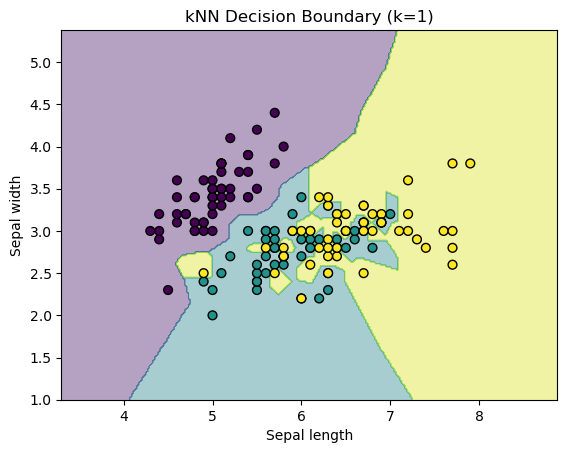

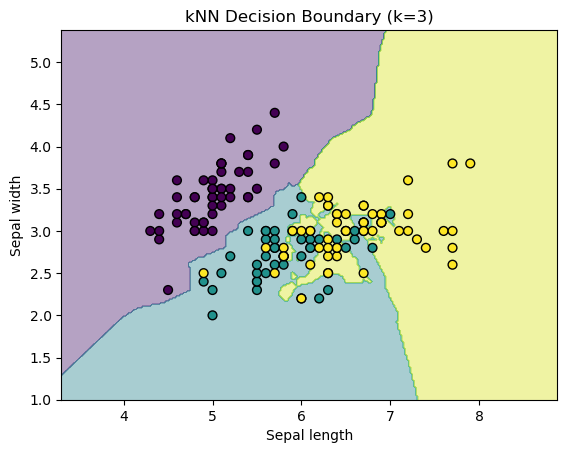

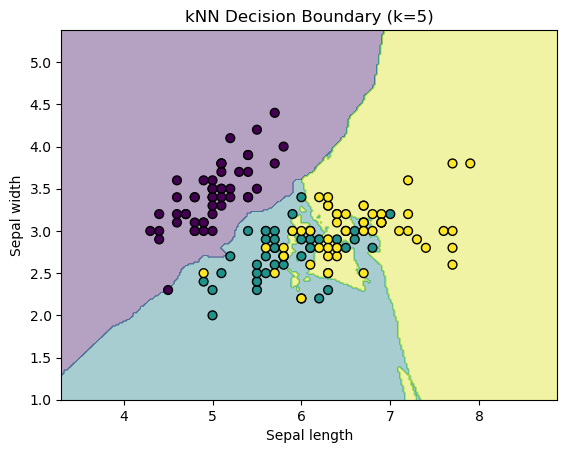

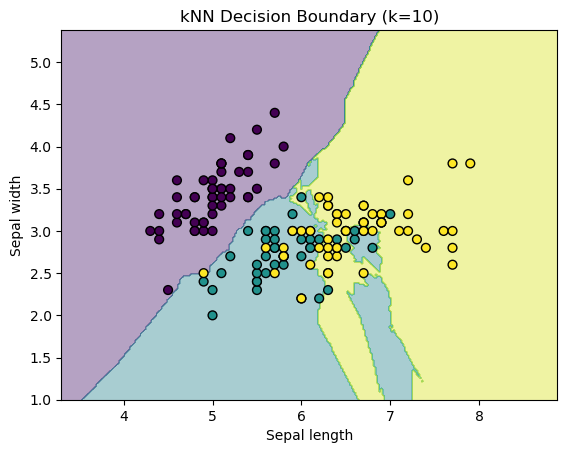

In [6]:
# Q8. kNN Classification with 2 features
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

X = iris.data[:, :2]
y = iris.target

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for k in [1, 3, 5, 10]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
    plt.title(f"kNN Decision Boundary (k={k})")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



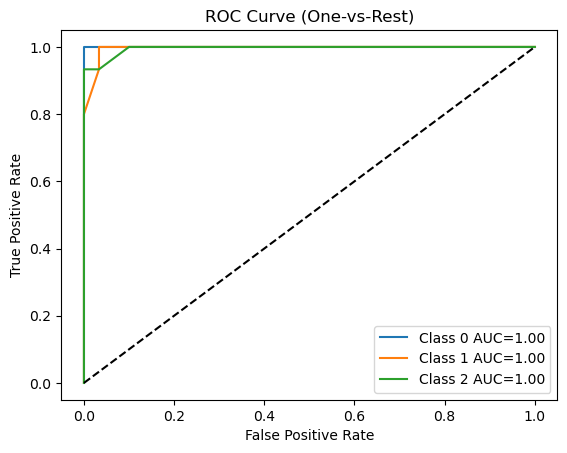

In [8]:
# Q9. Performance Evaluation with kNN
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42, stratify=y)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = knn.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC={roc_auc[i]:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()